In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../prep-data/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

<AxesSubplot:>

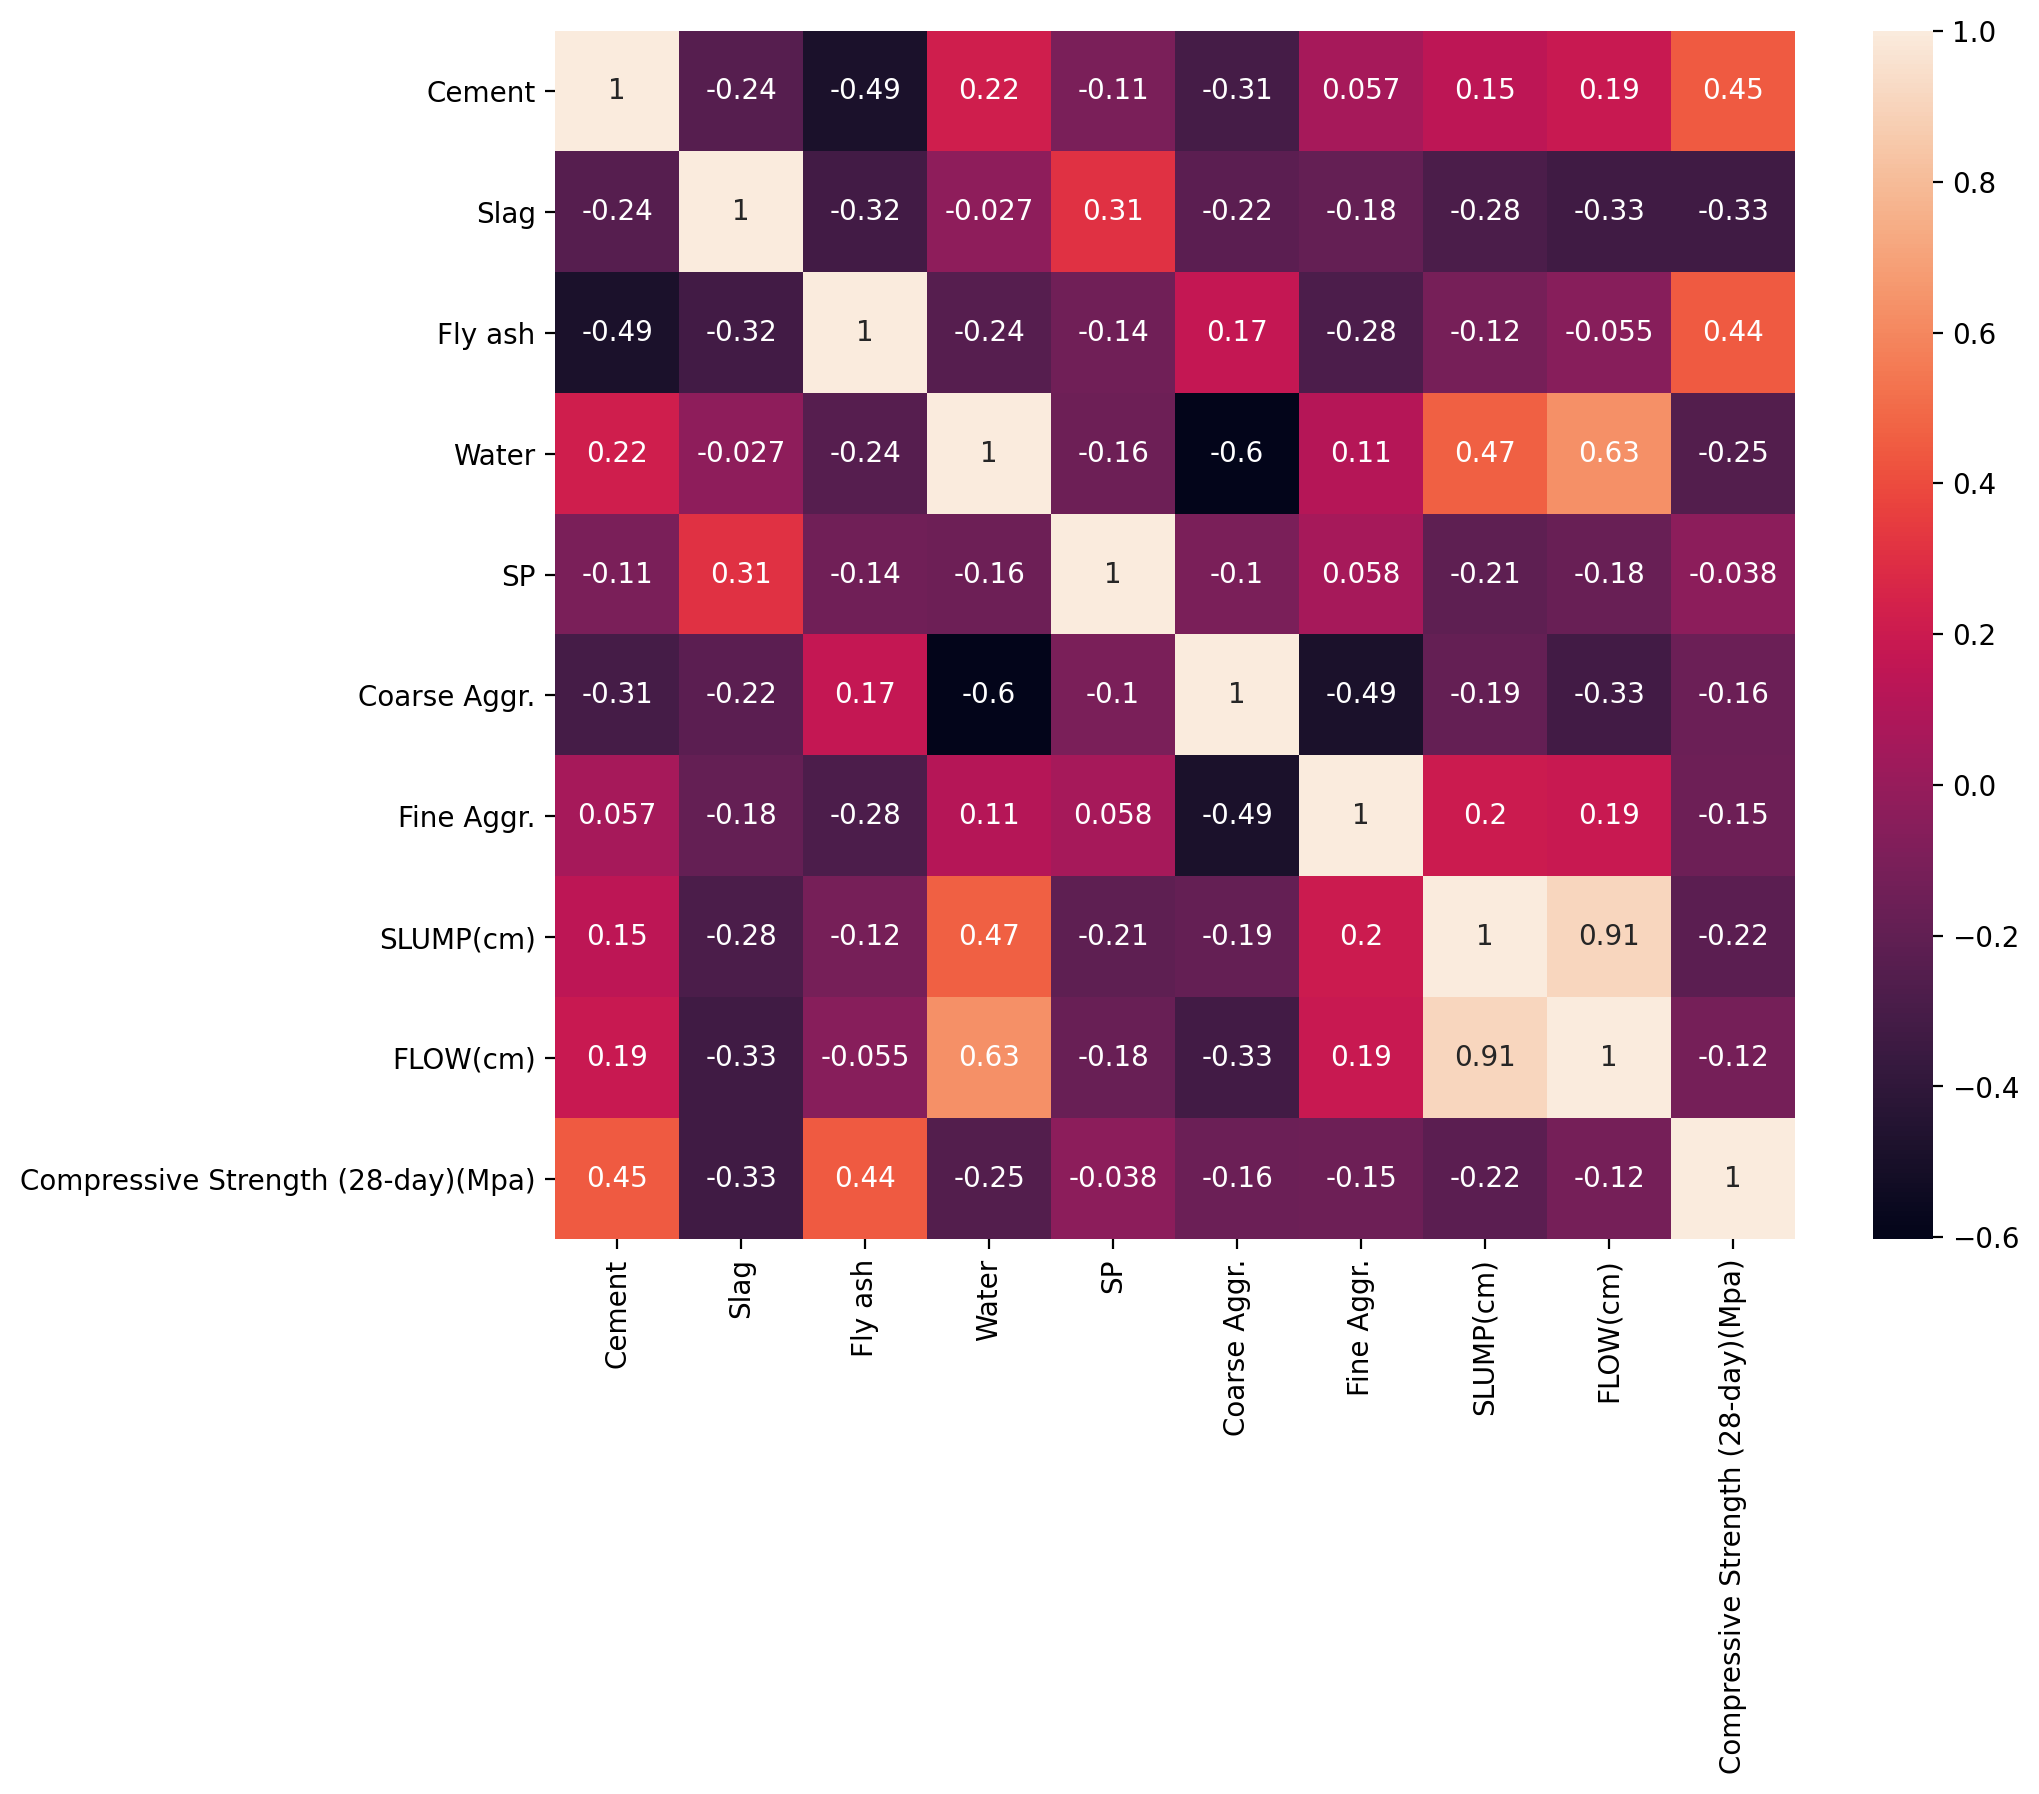

In [8]:
plt.figure(figsize=(10,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [10]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [11]:
y = df['Compressive Strength (28-day)(Mpa)']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from sklearn.svm import SVR, LinearSVC

In [19]:
# with noisy data we should decrease C -> more regularization
# epsilon = 0 -> the maximum allowable error per training instance is zero -> overfits the model to the train data! 

In [21]:
base_model = SVR()

In [22]:
base_model.fit(X_train, y_train)

SVR()

In [23]:
y_base_pred = base_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(y_test, y_base_pred)

5.236902091259178

In [26]:
np.sqrt(mean_squared_error(y_test, y_base_pred))

6.695914838327133

In [27]:
y_test.mean()

36.26870967741935

In [30]:
p_grid = {'C':[.001,.01,.1,.5,1],
         'kernel':['linear','rbf','poly'],
         'gamma':['scale','auto'],
         'degree':[2,3,4],
         'epsilon':[0,.01,.1,.5,1,2]}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
svr = SVR()

In [34]:
grid = GridSearchCV(svr, p_grid,verbose=1)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:    7.2s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [36]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [37]:
y_grid_pred = grid.predict(X_test)

In [38]:
mean_absolute_error(y_test, y_grid_pred)

2.5128012210762365

In [39]:
np.sqrt(mean_squared_error(y_test, y_grid_pred))

3.178210305119858